In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
df_final=pd.read_csv('data/output/final_Data.csv')
df_final.info()

/var/folders/2_/bhldy0qj4k5dfrybcw8kkm6m0000gn/T/ipykernel_14064/517137550.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_final=pd.read_csv('data/output/final_Data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357960 entries, 0 to 357959
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   gvkey               357960 non-null  int64  
 1   datadate            357960 non-null  object 
 2   fyear               357692 non-null  float64
 3   cusip               357960 non-null  object 
 4   ipodate             153325 non-null  object 
 5   conm                357960 non-null  object 
 6   at                  288230 non-null  float64
 7   sale                252854 non-null  float64
 8   ebit                247325 non-null  float64
 9   re                  280532 non-null  float64
 10  reuna               242654 non-null  float64
 11  wcap                206246 non-null  float64
 12  mkvalt              156879 non-null  float64
 13  lt                  287466 non-null  float64
 14  gsector             306857 non-null  float64
 15  indfmt              357960 non-nul

In [80]:
df_final_data_copy = df_final.copy()
df_final_data_copy.drop(columns=['reuna','issuer','issue','check_digit','issuer+issue','gvkey'], inplace=True)
df_final_data_copy['datadate']= pd.to_datetime(df_final_data_copy['datadate'])
df_final_data_copy['ipodate']= pd.to_datetime(df_final_data_copy['ipodate'])
df_final_data_copy['fyear'] =  df_final_data_copy.apply(lambda row: row['fyear'] if not pd.isna(row['fyear']) else row['datadate'].year,axis=1)
df_final_data_copy['fyear'] = df_final_data_copy['fyear'].astype(int)
columns_of_ratios = ['liquidity','re/at','profitability','mkvalt/lt','AssetTurnoverRatio']

In [81]:
df_final_data_copy['ipodate'].isna().sum()

204635

In [82]:
df_final_data_copy=df_final_data_copy[df_final_data_copy['ipodate'].between('2010-01-01','2023-12-31')]

ipodate
2010-01-07    22
2010-01-21    14
2010-01-22    49
2010-01-25     7
2010-01-26     8
              ..
2023-12-01     3
2023-12-14     4
2023-12-15     3
2023-12-19     4
2023-12-28     6
Name: count, Length: 1426, dtype: int64


<Axes: title={'center': 'Value Counts of ipodate'}, xlabel='ipodate'>

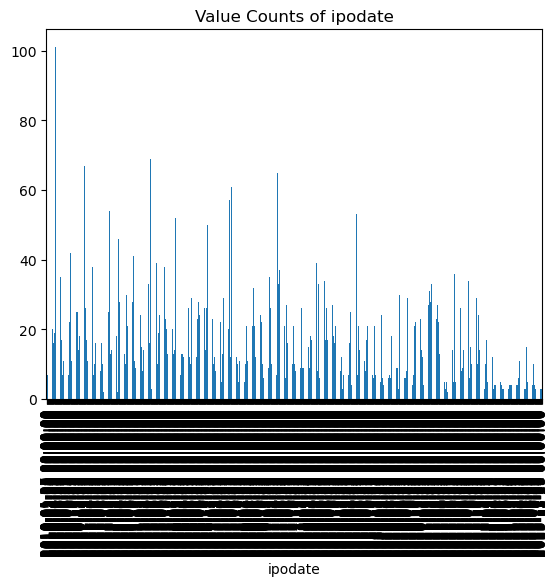

In [83]:
values_counts_ipodate = df_final_data_copy['ipodate'].value_counts().sort_index()
print(values_counts_ipodate)
values_counts_ipodate.plot(kind='bar',title='Value Counts of ipodate')


In [84]:
df_final_data_copy['ENDDAT'].value_counts().sort_index()

ENDDAT
2010-12-27        4
2011-03-18        5
2011-03-24        4
2011-03-30        6
2011-07-26        6
              ...  
2024-12-19       12
2024-12-20       28
2024-12-23       12
2024-12-24        5
2024-12-31    15653
Name: count, Length: 899, dtype: int64

indfmt
INDL    22244
FS       1789
Name: count, dtype: int64


<Axes: xlabel='indfmt'>

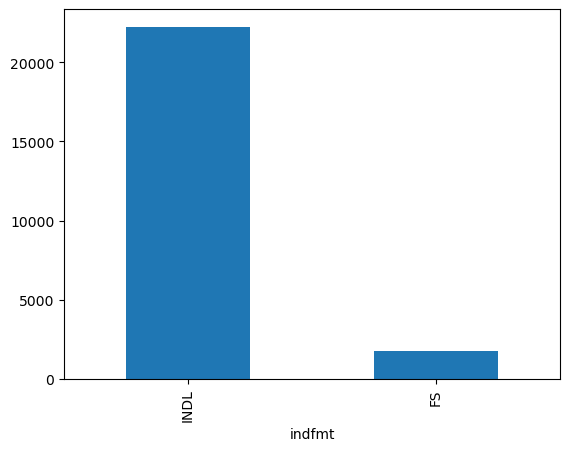

In [85]:
# showing different counts of financial and industrial data
value_counts = df_final_data_copy['indfmt'].value_counts()
print(value_counts)
value_counts.plot(kind='bar')

In [86]:
df_financial_data = df_final_data_copy[df_final_data_copy['indfmt']=='FS']
df_industrial_data = df_final_data_copy[df_final_data_copy['indfmt']=='INDL']

liquidity             1789
re/at                   33
profitability         1789
mkvalt/lt              590
AssetTurnoverRatio    1789
dtype: int64


<Axes: title={'center': 'NaNs Counts of financial'}>

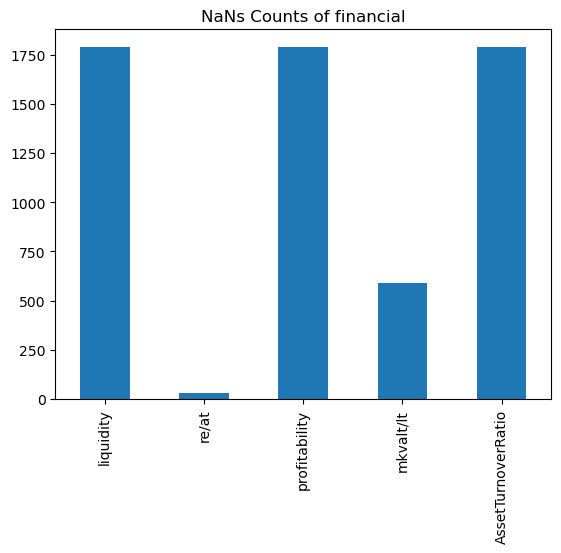

In [87]:
nas_in_finanical_data = df_financial_data[columns_of_ratios].isna().sum()
print(nas_in_finanical_data)
nas_in_finanical_data.plot(kind='bar',title="NaNs Counts of financial")

liquidity             4856
re/at                 2607
profitability         1652
mkvalt/lt             8605
AssetTurnoverRatio    1652
dtype: int64


<Axes: title={'center': 'NaNs Counts of industrial'}, xlabel='ratio', ylabel='Nans Counts'>

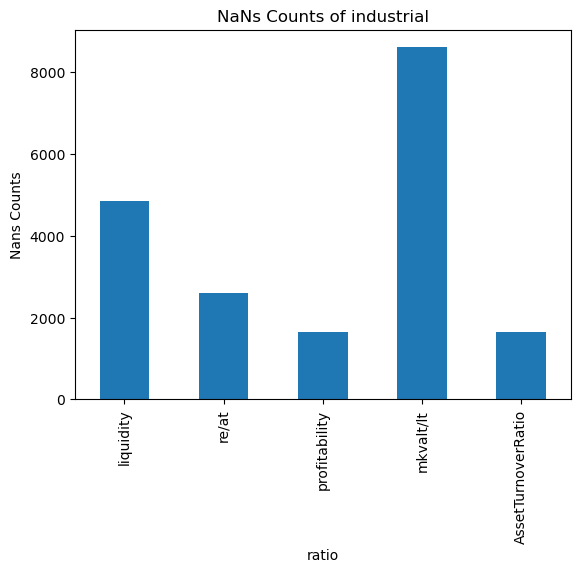

In [88]:
nas_in_industrial_data = df_industrial_data[columns_of_ratios].isna().sum()
print(nas_in_industrial_data)
nas_in_industrial_data.plot(kind='bar',title="NaNs Counts of industrial",xlabel='ratio',ylabel='Nans Counts')

In [89]:
df_industrial_data['gsector'] = df_industrial_data['gsector'].replace([np.inf, -np.inf], np.nan)
df_industrial_data['gsector'] = df_industrial_data['gsector'].fillna(0)



/var/folders/2_/bhldy0qj4k5dfrybcw8kkm6m0000gn/T/ipykernel_14064/353946891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_industrial_data['gsector'] = df_industrial_data['gsector'].replace([np.inf, -np.inf], np.nan)
/var/folders/2_/bhldy0qj4k5dfrybcw8kkm6m0000gn/T/ipykernel_14064/353946891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_industrial_data['gsector'] = df_industrial_data['gsector'].fillna(0)


In [90]:
df_industrial_data['gsector'] = df_industrial_data['gsector'].astype(int)

/var/folders/2_/bhldy0qj4k5dfrybcw8kkm6m0000gn/T/ipykernel_14064/314954257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_industrial_data['gsector'] = df_industrial_data['gsector'].astype(int)


gsector
35    6305
45    3375
40    3179
25    2513
20    1733
10    1410
50    1093
60     868
30     661
15     532
0      410
55     165
Name: count, dtype: int64


<Axes: title={'center': 'Value Counts of industrial sectors'}, xlabel='sector code', ylabel='No of rows'>

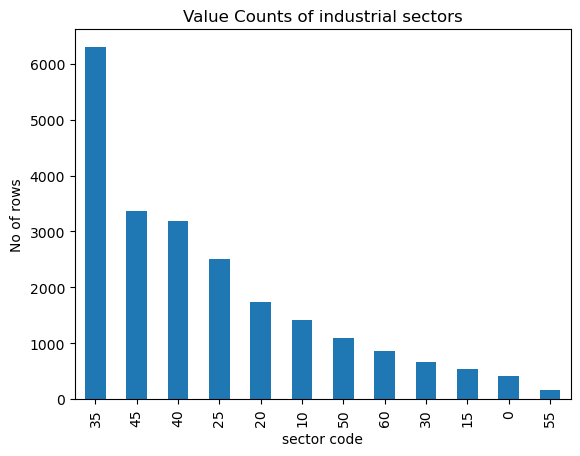

In [91]:
induatrial_value_countss = df_industrial_data['gsector'].value_counts()
print(induatrial_value_countss)
induatrial_value_countss.plot(kind='bar',title='Value Counts of industrial sectors',xlabel='sector code',ylabel='No of rows')

         liquidity  re/at  profitability  mkvalt/lt  AssetTurnoverRatio
gsector                                                                
0              209    209            269        245                 269
10              94    699             83        389                  83
15              50    114             56        217                  56
20             206    195            163        632                 163
25             272    240            195       1181                 196
30              53     70             59        264                  59
35             244    298            278       2182                 278
40            2624    216            124       1157                 123
45             310    322            304       1448                 304
50             100    110             76        533                  76
55               8     26              9         65                   9
60             686    108             36        292             

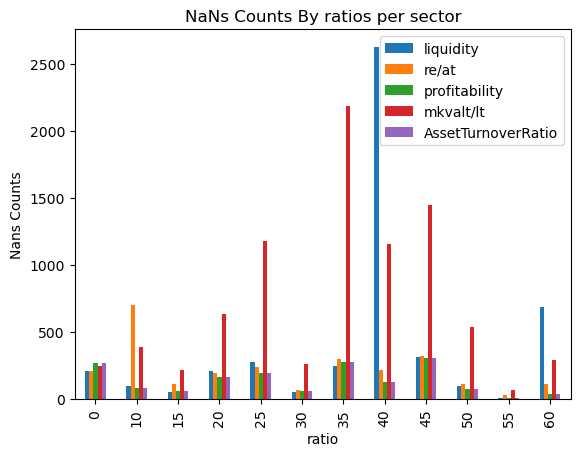

gsector
0     1201
10    1348
15     493
20    1359
25    2084
30     505
35    3280
40    4244
45    2688
50     895
55     117
60    1158
dtype: int64


<Axes: title={'center': 'NaNs Counts By Sector'}, xlabel='Sector', ylabel='Nans Counts'>

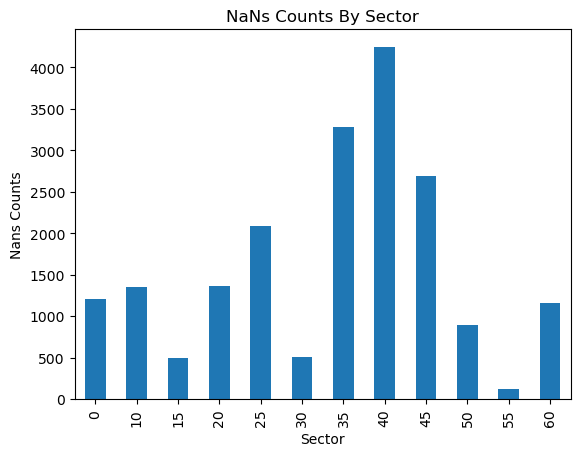

In [92]:
# Group by 'gsector' and count the number of NaN values in the specified columns
nan_counts_by_ratio = df_industrial_data.groupby('gsector')[columns_of_ratios].apply(lambda x: x.isna().sum())
nan_counts = df_industrial_data.groupby('gsector')[columns_of_ratios].apply(lambda x: x.isna().sum().sum())
# Display the result
print(nan_counts_by_ratio)

nan_counts_by_ratio.plot(kind='bar')
plt.title('NaNs Counts By ratios per sector')
plt.xlabel('ratio')
plt.ylabel('Nans Counts')
plt.show()

print(nan_counts)
nan_counts.plot(kind='bar',title='NaNs Counts By Sector',xlabel='Sector',ylabel='Nans Counts')


gsector
0     58.585366
10    19.120567
15    18.533835
20    15.683785
25    16.585754
30    15.279879
35    10.404441
40    26.700220
45    15.928889
50    16.376944
55    14.181818
60    26.682028
dtype: float64


<Axes: title={'center': 'Percentage of NaN by sector'}, xlabel='sector code', ylabel='Percentage'>

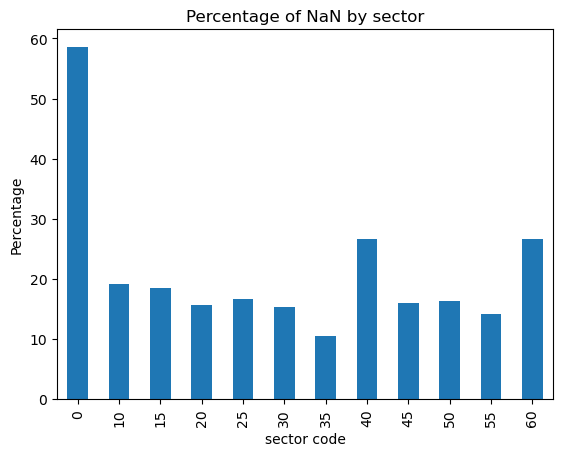

In [93]:
percentage_nan = (nan_counts / (induatrial_value_countss*5)) * 100
print(percentage_nan)
percentage_nan.plot(kind='bar',title='Percentage of NaN by sector',xlabel='sector code',ylabel='Percentage')



# Selecting Sector code 35 (Health Care) , as it has lowest percentage of NaN values, and also comparatively high number of rows ( 3rd position)

In [94]:
df =df_industrial_data[df_industrial_data['gsector']==35]
df

,datadate,fyear,cusip,ipodate,conm,at,sale,ebit,re,wcap,...,profitability,mkvalt/lt,AssetTurnoverRatio,PERMNO,DLSTCD,HCOMNAM,CUSIP,HEXCD,BEGDAT,ENDDAT
16464,2009-12-31,2009,68234X102,2013-07-18,ONCOMED PHARMACEUTICALS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14055,252,ONCOMED PHARMACEUTICALS INC,68234X10,3,2013-07-18,2019-04-22
16465,2010-12-31,2010,68234X102,2013-07-18,ONCOMED PHARMACEUTICALS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14055,252,ONCOMED PHARMACEUTICALS INC,68234X10,3,2013-07-18,2019-04-22
16466,2011-12-31,2011,68234X102,2013-07-18,ONCOMED PHARMACEUTICALS,107.205,31.409,-15.240,-126.071,82.096,...,-0.142158,NaN,0.292981,14055,252,ONCOMED PHARMACEUTICALS INC,68234X10,3,2013-07-18,2019-04-22
16467,2012-12-31,2012,68234X102,2013-07-18,ONCOMED PHARMACEUTICALS,79.768,24.681,-22.369,-148.340,51.256,...,-0.280426,NaN,0.309410,14055,252,ONCOMED PHARMACEUTICALS INC,68234X10,3,2013-07-18,2019-04-22
16468,2013-12-31,2013,68234X102,2013-07-18,ONCOMED PHARMACEUTICALS,333.685,37.779,-23.899,-174.412,256.727,...,-0.071621,4.025872,0.113218,14055,252,ONCOMED PHARMACEUTICALS INC,68234X10,3,2013-07-18,2019-04-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357937,2023-06-30,2023,75041J101,2021-11-25,RADIOPHARM THERANOSTICS LTD,49.883,0.194,-25.032,-42.564,2.043,...,-0.501814,NaN,0.003889,25871,100,RADIOPHARM THERANOSTICS LTD,75041J10,3,2024-11-27,2024-12-31
357938,2024-06-30,2024,75041J101,2021-11-25,RADIOPHARM THERANOSTICS LTD,48.062,0.199,-25.665,-57.945,3.517,...,-0.533998,NaN,0.004140,25871,100,RADIOPHARM THERANOSTICS LTD,75041J10,3,2024-11-27,2024-12-31
357946,2021-12-31,2021,405552100,2022-07-18,HALEON PLC,46650.099,12924.885,2816.529,35685.952,1371.703,...,0.060376,NaN,0.277060,23209,100,HALEON PLC,40555210,1,2022-07-22,2024-12-31
357947,2022-12-31,2022,405552100,2022-07-18,HALEON PLC,41948.594,13082.804,2913.448,19566.371,-374.724,...,0.069453,NaN,0.311877,23209,100,HALEON PLC,40555210,1,2022-07-22,2024-12-31


In [95]:
df_pivot1 = df.pivot_table(index=['cusip','conm','PERMNO','DLSTCD','HCOMNAM','HEXCD','BEGDAT','ENDDAT','ipodate'], columns='fyear', values=['liquidity','re/at','profitability','mkvalt/lt','AssetTurnoverRatio'])
df_pivot1.columns= [f'{year}-{ratio}' for ratio, year in df_pivot1.columns]
# Reset the index to make 'Company' a column again
df_pivot1.reset_index(inplace=True)

# Display the reshaped DataFrame
df_pivot1

,cusip,conm,PERMNO,DLSTCD,HCOMNAM,HEXCD,BEGDAT,ENDDAT,ipodate,2000-AssetTurnoverRatio,...,2015-re/at,2016-re/at,2017-re/at,2018-re/at,2019-re/at,2020-re/at,2021-re/at,2022-re/at,2023-re/at,2024-re/at
0,00091E109,ABSCI CORP,21604,100,ABSCI CORP,3,2021-07-22,2024-12-31,2021-07-22,NaN,...,NaN,NaN,NaN,NaN,-2.125006,-1.016891,-0.448241,-0.922248,-1.870850,NaN
1,00091F304,ABVC BIOPHARMA INC,21828,100,A B V C BIOPHARMA INC,3,2021-08-03,2024-12-31,2021-08-03,NaN,...,NaN,NaN,NaN,NaN,NaN,-2.432756,-2.934589,-5.656114,-4.509418,NaN
2,00166B105,ALX ONCOLOGY HOLDI INC,19542,100,ALX ONCOLOGY HOLDINGS INC,3,2020-07-17,2024-12-31,2020-07-17,NaN,...,NaN,NaN,NaN,-4.795683,-6.817347,-0.271806,-0.531284,-1.064678,-2.003752,NaN
3,002120202,ATYR PHARMA INC,15378,100,ATYR PHARMA INC,3,2015-05-07,2024-12-31,2015-05-07,NaN,...,-1.220706,-2.683113,-2.957932,-5.664145,-8.907483,-8.742731,-3.224586,-4.364594,-3.879696,NaN
4,00288U106,ABCELLERA BIOLOGICS INC,20276,100,ABCELLERA BIOLOGICS INC,3,2020-12-11,2024-12-31,2020-12-11,NaN,...,NaN,NaN,NaN,-0.116555,-0.200783,0.113573,0.203210,0.275678,0.186861,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,N71546100,PROSENSA HOLDING NV,13968,450,PROSENSA HOLDING N V,3,2013-06-28,2015-02-11,2013-06-28,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
869,Q73622104,PARNELL PHARMACEUTICAL HLDGS,14706,570,PARNELL PHARMACEUTICALS HLDG LTD,3,2014-06-18,2016-12-30,2014-06-18,NaN,...,-0.796305,-1.244593,-2.596763,-2.547288,-2.382256,NaN,NaN,NaN,NaN,NaN
870,T9224W109,STEVANATO GROUP S P A,21694,100,STEVANATO GROUP S P A,1,2021-07-16,2024-12-31,2021-07-16,NaN,...,NaN,NaN,NaN,NaN,NaN,0.327158,0.323365,0.369260,0.361442,NaN
871,Y1R80M106,CYTOMED THERAPEUTICS LIMITED,23858,100,CYTOMED THERAPEUTICS LTD,3,2023-04-14,2024-12-31,2023-04-14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.650488,-1.592868,-1.008537,NaN


In [96]:
selected_columns = df_pivot1.iloc[:, 9:]
# Count the number of NaN values in each row
nan_counts_per_row = selected_columns.isna().sum(axis=1)
print("Number of NaN values in each row:")
print(nan_counts_per_row)

Number of NaN values in each row:
0       92
1       96
2       87
3       62
4       87
      ... 
868    102
869     77
870     96
871    102
872     62
Length: 873, dtype: int64


In [97]:
df_temp = pd.DataFrame(selected_columns)
print(df_temp.shape)
print(df_temp[(nan_counts_per_row>110)].shape[0])
print(df_temp[(nan_counts_per_row>100)].shape[0])
print(df_temp[(nan_counts_per_row>90)].shape[0])
print(df_temp[(nan_counts_per_row>80)].shape[0])
print(df_temp[(nan_counts_per_row>70)].shape[0])
print(df_temp[(nan_counts_per_row>60)].shape[0])
print(df_temp[(nan_counts_per_row>50)].shape[0])
print(df_temp[(nan_counts_per_row>40)].shape[0])



(873, 115)
0
85
367
565
691
766
843
860


In [98]:
rows_to_remove = nan_counts_per_row[nan_counts_per_row > 90].index
df_pivot_after_dropping_nans= df_pivot1.drop(rows_to_remove)
df_pivot_after_dropping_nans

,cusip,conm,PERMNO,DLSTCD,HCOMNAM,HEXCD,BEGDAT,ENDDAT,ipodate,2000-AssetTurnoverRatio,...,2015-re/at,2016-re/at,2017-re/at,2018-re/at,2019-re/at,2020-re/at,2021-re/at,2022-re/at,2023-re/at,2024-re/at
2,00166B105,ALX ONCOLOGY HOLDI INC,19542,100,ALX ONCOLOGY HOLDINGS INC,3,2020-07-17,2024-12-31,2020-07-17,NaN,...,NaN,NaN,NaN,-4.795683,-6.817347,-0.271806,-0.531284,-1.064678,-2.003752,NaN
3,002120202,ATYR PHARMA INC,15378,100,ATYR PHARMA INC,3,2015-05-07,2024-12-31,2015-05-07,NaN,...,-1.220706,-2.683113,-2.957932,-5.664145,-8.907483,-8.742731,-3.224586,-4.364594,-3.879696,NaN
4,00288U106,ABCELLERA BIOLOGICS INC,20276,100,ABCELLERA BIOLOGICS INC,3,2020-12-11,2024-12-31,2020-12-11,NaN,...,NaN,NaN,NaN,-0.116555,-0.200783,0.113573,0.203210,0.275678,0.186861,NaN
5,00434H108,ACCELERON PHARMA INC,14176,233,ACCELERON PHARMA INC,3,2013-09-19,2021-11-19,2013-09-19,NaN,...,-2.102660,-1.473533,-1.217747,-1.864898,-1.408943,-0.941425,NaN,NaN,NaN,NaN
6,00437E102,ACCOLADE INC,19496,100,ACCOLADE INC,3,2020-07-02,2024-12-31,2020-07-02,NaN,...,NaN,NaN,NaN,-4.098157,-4.380570,-0.781308,-0.384779,-1.056723,-1.337492,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,N5749R100,MERUS NV,16062,100,MERUS N V,3,2016-05-19,2024-12-31,2016-05-19,NaN,...,-1.785720,-1.483801,-0.851000,-0.801233,-1.188464,-1.691229,-1.042814,-1.669322,-1.702753,NaN
866,N69605108,PHARVARIS NV,20615,100,PHARVARIS N V,3,2021-02-05,2024-12-31,2021-02-05,NaN,...,NaN,NaN,NaN,-1.922681,-0.896864,-0.439798,-0.412756,-0.978618,-0.667012,NaN
867,N71542109,PROQR THERAPEUTICS NV,14935,100,PROQR THERAPEUTICS N V,3,2014-09-18,2024-12-31,2014-09-18,NaN,...,-0.346929,-1.089284,-2.087610,-1.311387,-1.659459,-2.609720,-1.507371,-2.214940,-2.901252,NaN
869,Q73622104,PARNELL PHARMACEUTICAL HLDGS,14706,570,PARNELL PHARMACEUTICALS HLDG LTD,3,2014-06-18,2016-12-30,2014-06-18,NaN,...,-0.796305,-1.244593,-2.596763,-2.547288,-2.382256,NaN,NaN,NaN,NaN,NaN


## Imputing the entire data set df_pivot1

In [99]:
import numpy as np
from py_soft_impute.soft_impute import SoftImpute
df_pivot_to_impute = df_pivot1.iloc[:, 9:]
df_pivot_to_impute.replace([np.inf, -np.inf], np.nan, inplace=True)
df_pivot_to_impute.fillna(0, inplace=True)

/var/folders/2_/bhldy0qj4k5dfrybcw8kkm6m0000gn/T/ipykernel_14064/1919009486.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pivot_to_impute.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/2_/bhldy0qj4k5dfrybcw8kkm6m0000gn/T/ipykernel_14064/1919009486.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pivot_to_impute.fillna(0, inplace=True)


In [100]:
clf = SoftImpute(J=2, lambda_=0.0)
fit = clf.fit(df_pivot_to_impute.values)
pivot_impute = clf.predict(df_pivot_to_impute.values)
pivot_impute

array([[ 2.05888963e-05,  1.85882372e-05,  2.19599091e-05, ...,
        -1.83675958e-01, -2.73367592e-01, -6.28285605e-02],
       [ 2.51304025e-05,  2.26565897e-05,  2.68003815e-05, ...,
        -1.73877534e-01, -2.93446087e-01, -7.26525178e-02],
       [ 4.31269649e-04,  3.90560464e-04,  4.60117727e-04, ...,
        -5.74010925e+00, -7.23918654e+00, -1.46783237e+00],
       ...,
       [ 1.99447181e-05,  1.79764159e-05,  2.12695572e-05, ...,
        -1.30156641e-01, -2.26624985e-01, -5.70317990e-02],
       [ 5.48307696e-05,  4.93402783e-05,  5.84643316e-05, ...,
        -2.32446412e-01, -5.22800207e-01, -1.46734336e-01],
       [ 3.33028393e-05,  2.99433668e-05,  3.55070982e-05, ...,
        -1.02183613e-01, -2.86360179e-01, -8.59953756e-02]])

In [101]:
new_df = pd.DataFrame(pivot_impute, columns=df_pivot_to_impute.columns)
df_pivot1_imputed= df_pivot1.copy()
df_pivot1_imputed.iloc[:, 9:] = new_df

In [102]:
df_pivot1_imputed

,cusip,conm,PERMNO,DLSTCD,HCOMNAM,HEXCD,BEGDAT,ENDDAT,ipodate,2000-AssetTurnoverRatio,...,2015-re/at,2016-re/at,2017-re/at,2018-re/at,2019-re/at,2020-re/at,2021-re/at,2022-re/at,2023-re/at,2024-re/at
0,00091E109,ABSCI CORP,21604,100,ABSCI CORP,3,2021-07-22,2024-12-31,2021-07-22,2.058890e-05,...,-0.208715,-0.125246,-0.194546,-0.694358,-2.561480,-0.341520,-0.189889,-0.183676,-0.273368,-0.062829
1,00091F304,ABVC BIOPHARMA INC,21828,100,A B V C BIOPHARMA INC,3,2021-08-03,2024-12-31,2021-08-03,2.513040e-05,...,-0.225742,-0.120805,-0.157018,-0.524137,-1.695911,-0.389891,-0.201597,-0.173878,-0.293446,-0.072653
2,00166B105,ALX ONCOLOGY HOLDI INC,19542,100,ALX ONCOLOGY HOLDINGS INC,3,2020-07-17,2024-12-31,2020-07-17,4.312696e-04,...,-5.463250,-3.829837,-7.101144,-26.709526,-107.470165,-8.167921,-5.112787,-5.740109,-7.239187,-1.467832
3,002120202,ATYR PHARMA INC,15378,100,ATYR PHARMA INC,3,2015-05-07,2024-12-31,2015-05-07,3.113286e-05,...,-0.433920,-0.320171,-0.622242,-2.368807,-9.707614,-0.626372,-0.410210,-0.482935,-0.577398,-0.111459
4,00288U106,ABCELLERA BIOLOGICS INC,20276,100,ABCELLERA BIOLOGICS INC,3,2020-12-11,2024-12-31,2020-12-11,6.665455e-05,...,-0.766704,-0.506070,-0.882169,-3.262369,-12.780279,-1.190212,-0.709416,-0.752467,-1.011175,-0.216059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,N71546100,PROSENSA HOLDING NV,13968,450,PROSENSA HOLDING N V,3,2013-06-28,2015-02-11,2013-06-28,1.401171e-07,...,-0.000961,-0.000344,-0.000049,0.000399,0.005237,-0.001897,-0.000814,-0.000453,-0.001223,-0.000364
869,Q73622104,PARNELL PHARMACEUTICAL HLDGS,14706,570,PARNELL PHARMACEUTICALS HLDG LTD,3,2014-06-18,2016-12-30,2014-06-18,-4.777906e-06,...,-0.007305,-0.032548,-0.109405,-0.460183,-2.154159,0.027454,-0.013915,-0.054044,-0.013839,0.006828
870,T9224W109,STEVANATO GROUP S P A,21694,100,STEVANATO GROUP S P A,1,2021-07-16,2024-12-31,2021-07-16,1.994472e-05,...,-0.174638,-0.090879,-0.112081,-0.365583,-1.123011,-0.305235,-0.155294,-0.130157,-0.226625,-0.057032
871,Y1R80M106,CYTOMED THERAPEUTICS LIMITED,23858,100,CYTOMED THERAPEUTICS LTD,3,2023-04-14,2024-12-31,2023-04-14,5.483077e-05,...,-0.407814,-0.169931,-0.107682,-0.199231,0.477418,-0.771953,-0.351727,-0.232446,-0.522800,-0.146734


In [103]:
df_pivot1_imputed.to_csv('data/output/df_pivot1_imputed.csv', index=False)

## imputing the df after removing rows df_pivot_after_dropping_nans

In [104]:
import numpy as np
from py_soft_impute.soft_impute import SoftImpute
df_pivot_after_dropping_nans_to_impute = df_pivot_after_dropping_nans.iloc[:, 9:]
df_pivot_after_dropping_nans_to_impute.replace([np.inf, -np.inf], np.nan, inplace=True)
df_pivot_after_dropping_nans_to_impute.fillna(0, inplace=True)

clf = SoftImpute(J=2, lambda_=0.0)
fit = clf.fit(df_pivot_after_dropping_nans_to_impute.values)
imputed_array = clf.predict(df_pivot_after_dropping_nans_to_impute.values)
imputed_array

/var/folders/2_/bhldy0qj4k5dfrybcw8kkm6m0000gn/T/ipykernel_14064/3614672465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pivot_after_dropping_nans_to_impute.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/2_/bhldy0qj4k5dfrybcw8kkm6m0000gn/T/ipykernel_14064/3614672465.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pivot_after_dropping_nans_to_impute.fillna(0, inplace=True)


array([[ 1.41485866e-03,  1.32709095e-03,  1.51641043e-03, ...,
        -8.13363557e+00, -1.24086071e+01, -2.06703760e+00],
       [ 2.09190589e-05,  1.86348197e-05,  2.22664700e-05, ...,
        -3.98610089e-01, -4.48906353e-01, -5.52170635e-02],
       [ 1.53450910e-04,  1.43497521e-04,  1.64397048e-04, ...,
        -1.00470740e+00, -1.46267225e+00, -2.35039993e-01],
       ...,
       [ 9.87746698e-05,  9.30226033e-05,  1.05922833e-04, ...,
        -4.61967156e-01, -7.65323138e-01, -1.34928044e-01],
       [ 3.51041904e-06,  3.25293605e-06,  3.75617732e-06, ...,
        -3.13875686e-02, -4.14744398e-02, -6.12123092e-03],
       [ 7.37283191e-05,  6.94886461e-05,  7.90723256e-05, ...,
        -3.29635797e-01, -5.56774161e-01, -9.93687825e-02]])

In [105]:
new_df1 = pd.DataFrame(imputed_array, columns=df_pivot_after_dropping_nans_to_impute.columns)
df_pivot_after_dropping_nans_imputed= df_pivot_after_dropping_nans.copy()
df_pivot_after_dropping_nans_imputed.iloc[:, 9:] = new_df1
df_pivot_after_dropping_nans_imputed

,cusip,conm,PERMNO,DLSTCD,HCOMNAM,HEXCD,BEGDAT,ENDDAT,ipodate,2000-AssetTurnoverRatio,...,2015-re/at,2016-re/at,2017-re/at,2018-re/at,2019-re/at,2020-re/at,2021-re/at,2022-re/at,2023-re/at,2024-re/at
2,00166B105,ALX ONCOLOGY HOLDI INC,19542,100,ALX ONCOLOGY HOLDINGS INC,3,2020-07-17,2024-12-31,2020-07-17,0.001415,...,-19.267576,-7.984082,-13.239352,-8.646628,-3.783413,-6.115263,-5.636018,-8.133636,-12.408607,-2.067038
3,002120202,ATYR PHARMA INC,15378,100,ATYR PHARMA INC,3,2015-05-07,2024-12-31,2015-05-07,0.000021,...,-0.311631,-0.295808,-0.623968,-2.862198,-11.203721,-0.271594,-0.283656,-0.398610,-0.448906,-0.055217
4,00288U106,ABCELLERA BIOLOGICS INC,20276,100,ABCELLERA BIOLOGICS INC,3,2020-12-11,2024-12-31,2020-12-11,0.000153,...,-2.101478,-0.944196,-1.624445,-2.141738,-5.318770,-0.743015,-0.699469,-1.004707,-1.462672,-0.235040
5,00434H108,ACCELERON PHARMA INC,14176,233,ACCELERON PHARMA INC,3,2013-09-19,2021-11-19,2013-09-19,0.000490,...,-6.623000,-2.438655,-3.798989,2.022208,19.141428,-1.785241,-1.584157,-2.305900,-3.809947,-0.670553
6,00437E102,ACCOLADE INC,19496,100,ACCOLADE INC,3,2020-07-02,2024-12-31,2020-07-02,0.000070,...,-0.956103,-0.431715,-0.744324,-1.009327,-2.562738,-0.340262,-0.320703,-0.460533,-0.668650,-0.107215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,N5749R100,MERUS NV,16062,100,MERUS N V,3,2016-05-19,2024-12-31,2016-05-19,0.000011,...,-0.169522,-0.178948,-0.383772,-1.851544,-7.300250,-0.166427,-0.175132,-0.245733,-0.271054,-0.032394
866,N69605108,PHARVARIS NV,20615,100,PHARVARIS N V,3,2021-02-05,2024-12-31,2021-02-05,-0.000047,...,0.536706,-0.389207,-1.135098,-9.748735,-40.781838,-0.463326,-0.549379,-0.753396,-0.565158,-0.022362
867,N71542109,PROQR THERAPEUTICS NV,14935,100,PROQR THERAPEUTICS N V,3,2014-09-18,2024-12-31,2014-09-18,0.000099,...,-1.334940,-0.489783,-0.761412,0.436274,3.975536,-0.358016,-0.317277,-0.461967,-0.765323,-0.134928
869,Q73622104,PARNELL PHARMACEUTICAL HLDGS,14706,570,PARNELL PHARMACEUTICALS HLDG LTD,3,2014-06-18,2016-12-30,2014-06-18,0.000004,...,-0.048882,-0.026966,-0.050089,-0.131545,-0.458224,-0.022467,-0.022049,-0.031388,-0.041474,-0.006121


In [106]:
df_pivot_after_dropping_nans_imputed.to_csv('data/output/df_pivot_after_dropping_nans_imputed.csv', index=False)